In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

sns.set_theme(
    context="paper",
    style="whitegrid",
    rc={
        "figure.figsize": (3.5, 3.5),
        "figure.dpi": 150,
        "savefig.dpi": 300,
        "figure.constrained_layout.use": True,
    },
)


In [6]:
data_path = Path("/nfs/general/mid_data/out/")
filenames = list(data_path.glob("*.npy"))


def load_scale(filename: Path) -> pd.DataFrame:
    # filename of form {img_size}.npy
    img_size = int(filename.stem)
    data = np.load(filename)
    # columns of data: opt_conn, cnn_conn, cnn_power, opt_count, cnn_count
    # keep only the ones relating to cnn
    return pd.DataFrame(
        {
            "img_size": img_size,
            "connectivity": data[:, 1],
            "power": data[:, 2],
            "n_comm": data[:, 4],
        }
    )


df = pd.concat([load_scale(f) for f in filenames], axis=0, ignore_index=True)
df = df.query("power > 0")
df.head()


,img_size,connectivity,power,n_comm
0,768,0.001167,7.2,182.0
1,768,0.000529,7.8,178.0
2,768,0.001008,15.2,140.0
3,768,0.001294,10.8,154.0
4,768,0.000701,11.2,136.0


In [7]:
meters_per_pixel = 1.25
df["width"] = df["img_size"] * 1.25
df["power_per_area"] = df["power"] / df["width"] ** 2
df["power_per_area_db"] = 10 * np.log10(df["power_per_area"])


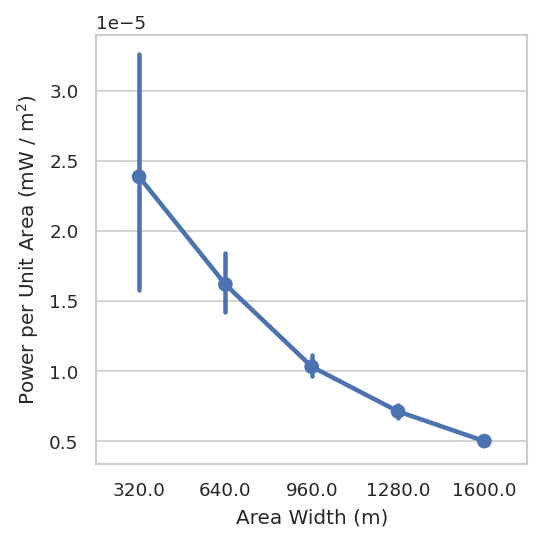

In [8]:
sns.pointplot(
    data=df,
    x="width",
    y="power_per_area",
    errorbar="ci",
)
plt.xlabel("Area Width (m)")
plt.ylabel("Power per Unit Area (mW / m$^2$)")
plt.savefig("../figures/mid.pdf")
plt.show()
